In [137]:
import lightkurve as lk
from lightkurve import search_tesscut
tpfs = lk.search_tesscut('TIC 298907057').download(cutout_size=20)

In [138]:
tpfs

TessTargetPixelFile(TICID: TIC 298907057)

In [139]:
tpfs.mission

'TESS'

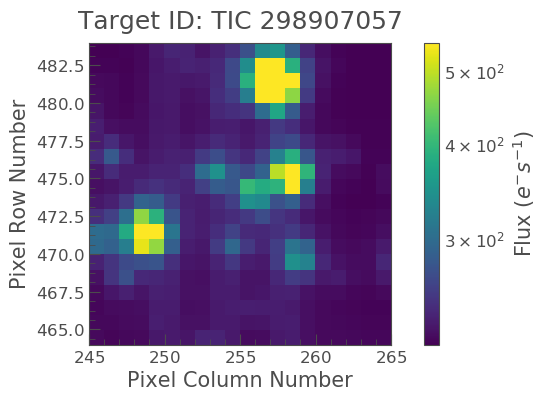

In [140]:
tpfs.plot(scale='log')

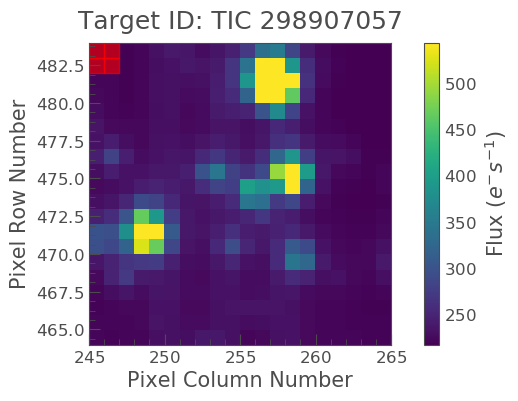

In [151]:
import numpy as np
aper = np.zeros(tpf.shape[1:], dtype=np.int)
aper[-2:, 0:2] = 1
tpfs.plot(aperture_mask=aper, mask_color='red');

In [160]:
# Build the NEW aperture, and the light curve
aper = np.zeros(tpfs[0].shape[1:])
print('hello1')
aper[-2:, 0:2] = 1
print('hello2')
user_lc = tpfs[0].to_lightcurve(aperture_mask=aper.astype(bool))
print('hello3')
for tpf in tpfs:
    #aper = np.zeros(tpf.shape[1:])
    #aper[-2:, 0:2]=1
    user_lc = user_lc.append(tpf.to_lightcurve(aperture_mask=aper.astype(bool)))

# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()

hello1
hello2
hello3


/anaconda3/lib/python3.6/site-packages/lightkurve/utils.py:91: RuntimeWarning: invalid value encountered in double_scalars
  percent_masked = 100. * n_cadences_masked / n_cadences


IndexError: index 0 is out of bounds for axis 0 with size 0